### Airlines Passenger Forecasting using Stacked LSTM

This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

In [1]:
#kaggle dataset
#https://www.kaggle.com/rakannimer/air-passengers?select=AirPassengers.csv

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Code to read csv file into colaboratory:

#3.1 Read file as panda dataframe
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Complete Projects/AirLines-Passengers-Forecasting-LSTM-master/AirPassengers.csv')

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
import matplotlib.pyplot as plt

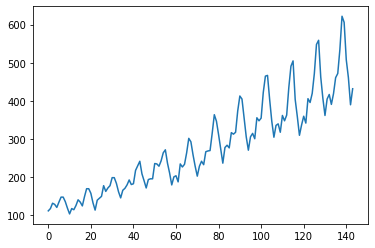

In [8]:
plt.plot(df.iloc[:,1])

### Scaling
LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
df.iloc[:,1]

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [12]:
df.shape

(144, 1)

In [13]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [14]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)

In [15]:
training_size

93

In [16]:
test_size=len(df)-training_size

In [17]:
test_size

51

In [18]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [19]:
test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train.shape, y_train.shape

((88, 4), (88,))

In [23]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [24]:
X_train.shape

(88, 4, 1)

In [25]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
88/88 [==============================] - 4s 13ms/step - loss: 0.0115 - val_loss: 0.0419
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0294
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0313
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0308
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0305
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0281
Epoch 7/100
88/88 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0362
Epoch 8/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0240
Epoch 9/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0261
Epoch 10/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0451
Epoch 11

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
test_predict

array([[0.39138755],
       [0.36539224],
       [0.5441587 ],
       [0.41041812],
       [0.49879968],
       [0.6724713 ],
       [0.65641356],
       [0.6267164 ],
       [0.4310498 ],
       [0.40779176],
       [0.33678022],
       [0.48270446],
       [0.42149863],
       [0.38644207],
       [0.5504636 ],
       [0.4027262 ],
       [0.5249527 ],
       [0.6958371 ],
       [0.71873844],
       [0.6903541 ],
       [0.33637154],
       [0.49213764],
       [0.2987559 ],
       [0.48728502],
       [0.47865704],
       [0.4155975 ],
       [0.6655044 ],
       [0.4522971 ],
       [0.6493808 ],
       [0.70860696],
       [0.8635307 ],
       [0.6782747 ],
       [0.4156396 ],
       [0.5184492 ],
       [0.34690648],
       [0.617314  ],
       [0.5176819 ],
       [0.48563755],
       [0.6410777 ],
       [0.6566999 ],
       [0.6234709 ],
       [0.88079727],
       [0.93073386],
       [0.5903391 ],
       [0.4945093 ],
       [0.53062797]], dtype=float32)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
test_predict

array([[306.73874],
       [293.27316],
       [385.8742 ],
       [316.5966 ],
       [362.37823],
       [452.34015],
       [444.02225],
       [428.6391 ],
       [327.28378],
       [315.23615],
       [278.45215],
       [354.04092],
       [322.33627],
       [304.177  ],
       [389.14017],
       [312.61218],
       [375.9255 ],
       [464.44363],
       [476.30652],
       [461.60345],
       [278.24048],
       [358.9273 ],
       [258.75555],
       [356.41367],
       [351.94434],
       [319.2795 ],
       [448.7313 ],
       [338.28992],
       [440.37927],
       [471.0584 ],
       [551.3089 ],
       [455.3463 ],
       [319.3013 ],
       [372.5567 ],
       [283.69757],
       [423.76865],
       [372.15924],
       [355.56027],
       [436.07825],
       [444.17056],
       [426.95795],
       [560.253  ],
       [586.1202 ],
       [409.7957 ],
       [360.15582],
       [378.8653 ]], dtype=float32)

In [31]:
y_train.shape,train_predict.shape,train_predict

((88,), (88, 1), array([[131.55104 ],
        [125.84802 ],
        [138.49358 ],
        [149.66035 ],
        [150.09421 ],
        [140.64818 ],
        [126.43817 ],
        [112.80892 ],
        [122.32525 ],
        [118.515686],
        [128.11462 ],
        [142.20554 ],
        [137.51968 ],
        [130.3244  ],
        [152.2463  ],
        [170.774   ],
        [170.81769 ],
        [161.77538 ],
        [140.13588 ],
        [123.72762 ],
        [144.40991 ],
        [146.5058  ],
        [152.15054 ],
        [180.54842 ],
        [163.79272 ],
        [177.1274  ],
        [181.77205 ],
        [203.10446 ],
        [200.19553 ],
        [186.69006 ],
        [167.75719 ],
        [154.0198  ],
        [172.38454 ],
        [173.40169 ],
        [183.02484 ],
        [196.47221 ],
        [182.70395 ],
        [188.5969  ],
        [225.13498 ],
        [230.52837 ],
        [245.4251  ],
        [204.63455 ],
        [198.04527 ],
        [178.4018  ],
        [202.357

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.12493856746153

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

392.28559436228886

In [34]:
### Plotting 
# shift train predictions for plotting
lookback=4
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: ignored